# Сборный проект 1 
# Изучение закономерностей определяющих успешность игры
***
## Описание проекта
Исследовательский анализ данных, составление портрета пользователя, и проверка гипотез для интернет-магазина по продаже компьютерных игр 
***
## Цель исследования
Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
***
## Задачи исследования
  1. Подготовка данных:
  
        * [Изучение файлов с данными, получение общей информации, загрузка библиотек](#p1);
        
        * [Изменение типов данных](#p2);
            
        * [Обработка пропусков](#p3);
        
        * [Обработка дубликатов](#p4);
        
        - [Добавление столбца с суммарными продажами во всех регионах](#p5).
        
        
  2. Исследовательский анализ данных:
  
        - [Определение периода исследования](#p6);
        
        - [Выбор потенциально прибыльных платформ](#p7);
        
        - [Анализ продаж по платформам](#p8);
        
        - [Анализ влияния отзывов пользователей и критиков на продажи](#p9);
        
        - [Распределение игр по жанрам](#p10).
        
        
  3. Составление портрета пользователя:
     
        - [Опредление популярных платформ](#p11);
        
        - [Опредление популярных жанров](#p12);
        
        - [Влияние рейтинга ESRB на продажи](#p13).
        
        
  4. Проверка гипотез:
  
        - [Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC](#p14);
        - [Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports](#p15).
        


  5. [Общий вывод](#p16)
***
## Описание данных

* Name — название игры
    
* Platform — платформа
    
* Year_of_Release — год выпуска
    
* Genre — жанр игры
    
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
    
* EU_sales — продажи в Европе (миллионы проданных копий)
    
* JP_sales — продажи в Японии (миллионы проданных копий)
    
* Other_sales — продажи в других странах (миллионы проданных копий)
    
* Critic_Score — оценка критиков (максимум 100)
    
* User_Score — оценка пользователей (максимум 10)
    
* Rating — рейтинг от организации ESRB (возрастная категория)

## 1. Подготовка данных

<a id='p1'></a>
### Изучение файлов с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.ticker as ticker
from dateutil.relativedelta import relativedelta

In [2]:
df1 = pd.read_csv(r"C:\Users\uubus\Desktop\Новая папка\games.csv")
df = df1.copy()
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия столбцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='p2'></a>
### Изменение типов данных

Изменим тип данных в колонке "year_of_release" на datetime

In [5]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'],format = '%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='p3'></a>
### Обработка пропусков

In [7]:
#количество пропусков по столбцам
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Есть всего два пропуска в столбцах "name" и "genre"  
269 пропусков в колонке "year_of_release"  
6766 пропусков в колонке "rating"  
Для большого количества игр нет рейтинга критиков, пользователей. Возможные причины: 
 
      1) игры не сильно популярны, чтоб оцениваться;   
      2) старая дата релиза, когда не ставили оценок. 

Так как пропусков в столбцах "name", "genre" и "year_of_release" не так много, удалим их

In [8]:
df = df.dropna(subset=['genre', 'name', 'year_of_release'])

Заполним пропуски в столбце rating на значение "unknown":

In [9]:
df.loc[df['rating'].isna(),'rating'] = 'unknown'

В колонке "user_score" для некоторых игр вместо оценки в виде числа - строковое значение "tbd".  
Чтобы не потерять игры с данным рейтингом при дальнейшем анализе, заменим tbd на -1. 

In [10]:
df.loc[df['user_score']=='tbd','user_score'] = -1
df.loc[:,'user_score'] = df.loc[:,'user_score'].astype('float')

<a id='p4'></a>
### Обработка дубликатов

Найдем количество явных дубликатов

In [11]:
df.duplicated().sum()

0

Явных дубликатов нет


Найдем количество явных дубликатов по столбцам "name" и "platform"

In [12]:
df[df.duplicated(subset=['name','platform'],keep=False)][['name','platform']]

,name,platform
604,Madden NFL 13,PS3
1190,Need for Speed: Most Wanted,X360
1591,Need for Speed: Most Wanted,X360
5972,Need for Speed: Most Wanted,PC
11715,Need for Speed: Most Wanted,PC
16230,Madden NFL 13,PS3


Дубликатов по двум столбцам всего 5, поэтому ими можно пренебречь

<a id='p5'></a>
### Добавление столбца с суммарными продажами во всех регионах

In [13]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1) #создание нового столбца с общими продажами
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## 2. Исследовательский анализ данных

<a id='p6'></a>
### Определение периода исследования

In [14]:
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12)

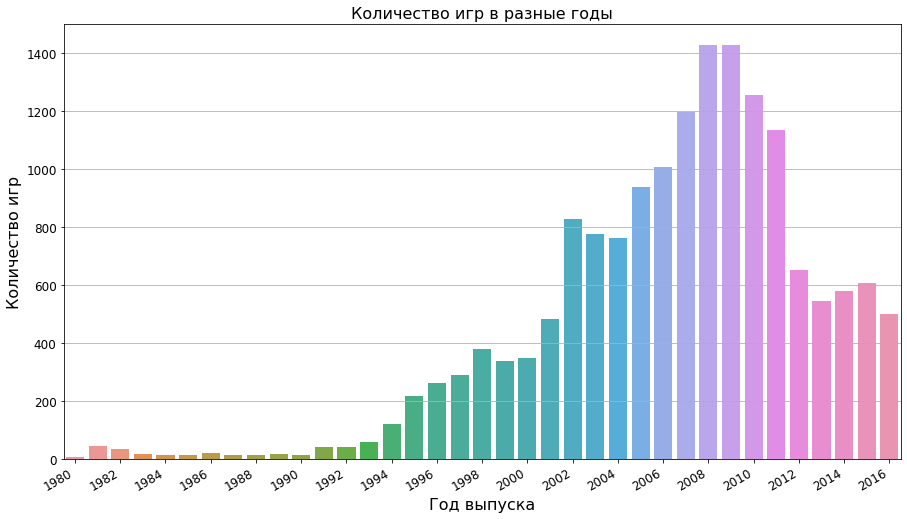

In [15]:
#создаем датафрейм с количеством выпущенных игр в разные годы
df_grouped_by_year = (df.groupby('year_of_release')['name']
                      .count()
                      .reset_index())
fig, ax = plt.subplots(figsize = (15,8))    
fig = sns.barplot(data=df_grouped_by_year,
                  x='year_of_release',
                  y='name'
                 )
x_dates = df_grouped_by_year['year_of_release'].dt.year
ax.set_xticklabels(labels=x_dates, 
                   rotation=30, 
                   ha='right'
                  )
plt.yticks(fontsize=12)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel(xlabel='Год выпуска')
ax.set_ylabel(ylabel='Количество игр')
ax.set_title(label='Количество игр в разные годы')
ax.grid(True,axis='y')
plt.show()

- В период с 1980 - 1995 игр выпускалось мало из-за слабого технического развития и малого увлечения компьютерными играми, поэтому эти данные можно не учитывать.  
- До 2008 происходил постпенный рост и в 2008 году зафиксирован исторический максимум по количеству выпускаемых игр = 1427.   
- С 2009 по 2011 идет постепенное снижение количества игра.
- В 2012 году произошел резкий спад. С 2012 по 2016 год количество выпускаемых игр примерно одинаково.

Рассмотрим как менялись продажи с годами по платформам на линейном графике

In [16]:
#График для построения линейного графика
def my_plotter(ax, data1, data2, param_dict, n_title, n_y, n_x):
    
    ax = sns.lineplot(x=data1,
                      y= data2,
                      **param_dict
                     )
    plt.grid(True)
    ax.set_xlabel(xlabel=n_x)
    ax.set_ylabel(ylabel=n_y)
    ax.set_title(label=n_title)
    ax.legend(fontsize = 12,
              ncol = 2,    
              title = 'Платформы',
              title_fontsize = '16'
             )
    return ax

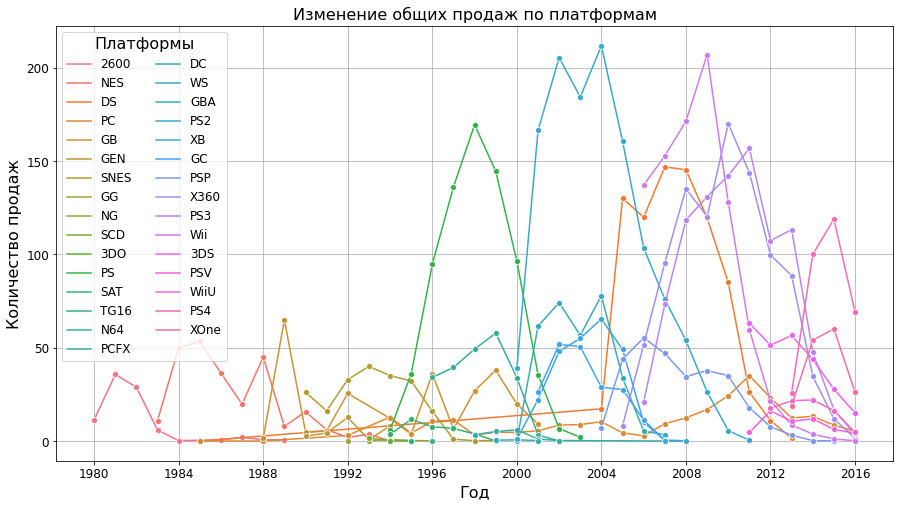

In [17]:
tmp = df.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
fig, ax = plt.subplots(figsize = (15,8))
ax = my_plotter(ax, 
                tmp['year_of_release'],  
                tmp['total_sales'], 
                {'hue':tmp['platform'],'marker':'o'},
                'Изменение общих продаж по платформам',
                'Количество продаж',
                'Год'
               )
plt.show()

Построим аналогичный график только для платформ с максимальными продажами  
Найдем платформы лидеры

In [18]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Возьмем первые 10 платформ

In [19]:
#список платформ с самыми большими продажами
list_of_platforms = (df.groupby('platform')['total_sales'].sum()
                     .sort_values(ascending=False)
                     .head(10)
                     .index)

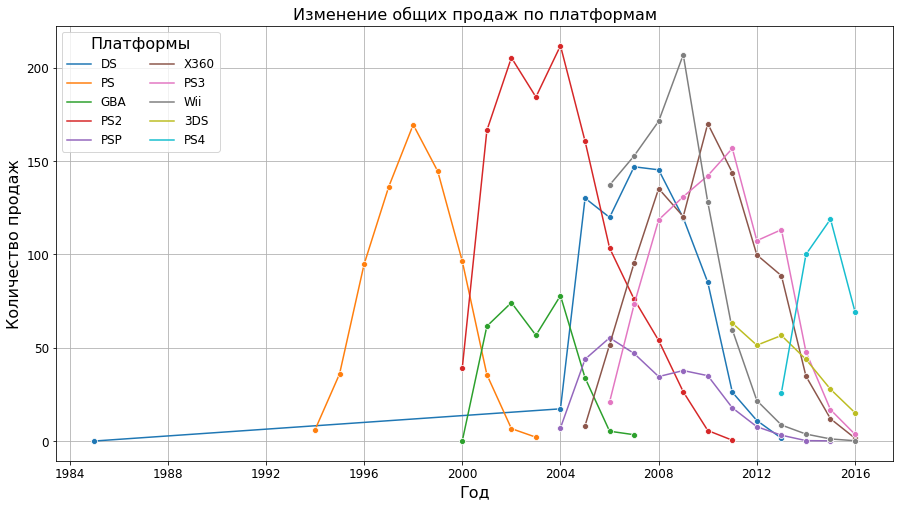

In [20]:
#датафрейм с платформами из топ-10
tmp = (df[df['platform'].isin(list_of_platforms)]
       .groupby(['year_of_release','platform'])['total_sales']
       .sum()
       .reset_index()
      )
#построение графика изменения продаж для топ-6 платформ
fig, ax = plt.subplots(figsize = (15,8))
ax = my_plotter(ax, 
                tmp['year_of_release'],  
                tmp['total_sales'], 
                {'hue':tmp['platform'],'marker':'o'},
                'Изменение общих продаж по платформам',
                'Количество продаж',
                'Год'
               )
plt.show()

- Длинный "хвост" у платформы DS говорит о том, что в данных есть ошибка.  
- Из графика видно, что платформы-лидеры по продажам проживали от 4 - 10 лет, а максимум приходился на первые 2-3 года.
- Для более точного определения периода с которого необходимо проводить анализ, найдем среднее время жизни и среднее время до достижения максимума продаж для этих платформ

In [21]:
#Удалим ошибку для платформы DS
tmp = tmp[tmp['year_of_release']>'1988']
#cоздадим датафрейм с платформой, 1 и последним годом продаж, а также годом, на который пришелся максимум продаж
platform = [] #список платформ
list_of_min_date=[] #список первых дат продаж для платформ
list_of_max_date=[] #список последних дат продаж для платформ
list_of_date_max_sales = [] #список дат с максимальными продажами для платформ
#заполняем списки
for i in tmp['platform'].unique():
    tmp1=tmp[tmp['platform']==i]
    platform.append(i)
    list_of_min_date.append(tmp1['year_of_release'].min())
    list_of_max_date.append(tmp1['year_of_release'].max())
    list_of_date_max_sales.append(tmp1.loc[tmp1['total_sales'].idxmax(),'year_of_release'])
# формирование датафрейма
df_year = pd.DataFrame({'platform':platform,
                        'min_year':list_of_min_date,
                        'max_year':list_of_max_date,
                        'max_sales_year':list_of_date_max_sales}
                      )
#создаем столбец с количеством лет между 1 и последним годом продаж (время жизни)
df_year['life']= df_year.apply(lambda x: relativedelta(x['max_year'], 
                                                       x['min_year']).years,
                               axis='columns')
#создаем столбец с количеством лет между 1 годом продаж и годом с максимальными продажами (время до достижения максимума)
df_year['life_to_max'] = df_year.apply(lambda x: relativedelta(x['max_sales_year'], 
                                                               x['min_year']).years,
                                       axis='columns')
df_year

,platform,min_year,max_year,max_sales_year,life,life_to_max
0,PS,1994-01-01,2003-01-01,1998-01-01,9,4
1,GBA,2000-01-01,2007-01-01,2004-01-01,7,4
2,PS2,2000-01-01,2011-01-01,2004-01-01,11,4
3,DS,2004-01-01,2013-01-01,2007-01-01,9,3
4,PSP,2004-01-01,2015-01-01,2006-01-01,11,2
5,X360,2005-01-01,2016-01-01,2010-01-01,11,5
6,PS3,2006-01-01,2016-01-01,2011-01-01,10,5
7,Wii,2006-01-01,2016-01-01,2009-01-01,10,3
8,3DS,2011-01-01,2016-01-01,2011-01-01,5,0
9,PS4,2013-01-01,2016-01-01,2015-01-01,3,2


In [22]:
# Вывод результатов
print('Среднее время жизни платформ:',df_year['life'].mean())
print('Медианное время жизни платформ:',df_year['life'].median())
print('Среднее время до достижения максимума продаж платформ:',df_year['life_to_max'].mean())
print('Медианное время до достижения максимума продаж платформ:',df_year['life_to_max'].median())

Среднее время жизни платформ: 8.6
Медианное время жизни платформ: 9.5
Среднее время до достижения максимума продаж платформ: 3.2
Медианное время до достижения максимума продаж платформ: 3.5


 - Для прогнозирования продаж на будущий год необходимо исследовать продажи игр на платформах, которые не достигли своего максимума, тогда возьмем данные с 2014 года

<a id='p7'></a>
### Потенциально прибыльные платформы

In [23]:
df_2014 = df.copy()
df_2014 = df_2014[df_2014['year_of_release']>='2014'] #данные за период с 2014 года

Рассмотрим рейтинг платформ по продажам

In [24]:
df_2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

- В тройке лидеров находятся платформы: 1)PS4; 2)XOne; 3)3DS.  
- Рассмотрим динамику продаж для первых 6 платформ 

In [25]:
list_of_platforms_2014 = df_2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index
list_of_platforms_2014

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU'], dtype='object', name='platform')

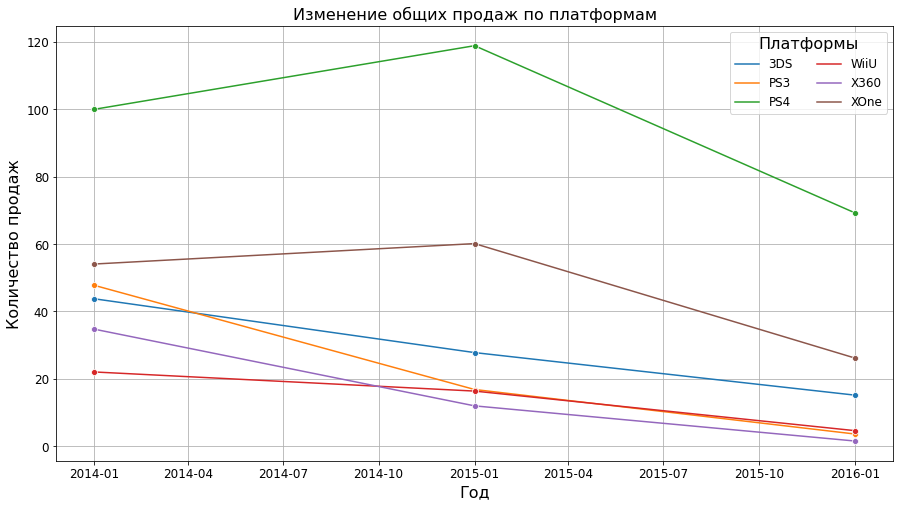

In [26]:
tmp = (df_2014[df_2014['platform'].isin(list_of_platforms_2014)]
       .groupby(['year_of_release','platform'])['total_sales']
       .sum()
       .reset_index()
      )
fig, ax = plt.subplots(figsize = (15,8))
ax = my_plotter(ax, 
                tmp['year_of_release'],  
                tmp['total_sales'], 
                {'hue':tmp['platform'],'marker':'o'},
                'Изменение общих продаж по платформам',
                'Количество продаж',
                'Год'
               )
plt.show()

- Судя по графикам общих продаж для каждой платформы у всех компаниий имеется тенденция к снижению продаж. 

- Выбрать платформу, которая имела бы потенциал к росту не представляется возможным

<a id='p8'></a>
### Анализ продаж по платформам

In [27]:
#создадим новый DF c 2014 года и 6 лучших по продажам
df_2014_top6=df_2014[df_2014['platform'].isin(list_of_platforms_2014)].reset_index(drop=True)

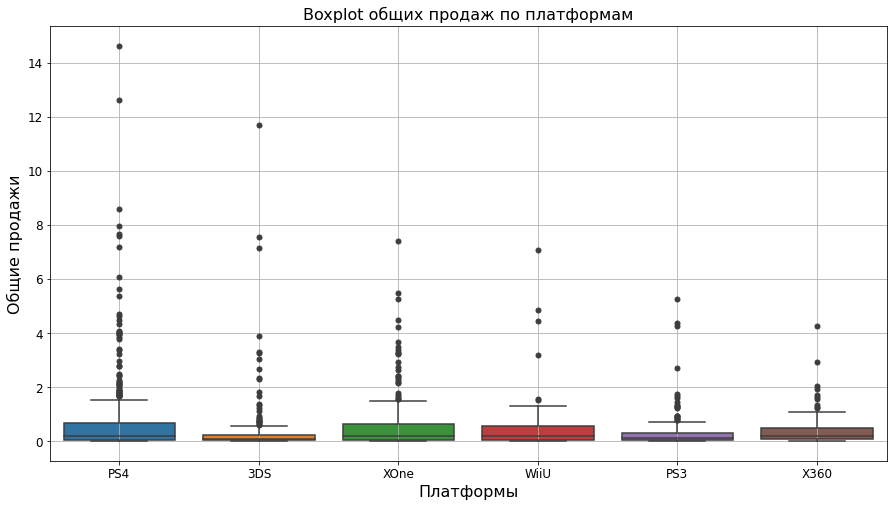

In [28]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.boxplot(data=df_2014_top6,
                 x='platform',
                 y='total_sales',
                 flierprops={"marker": "o"}
                )
ax.set_xlabel('Платформы')
ax.set_ylabel('Общие продажи')
ax.set_title('Boxplot общих продаж по платформам')
plt.grid(True)
plt.show()

Ограничим ось y, так как из-за наличия аномальных значений продаж, плохо видны основные продажи по платформам

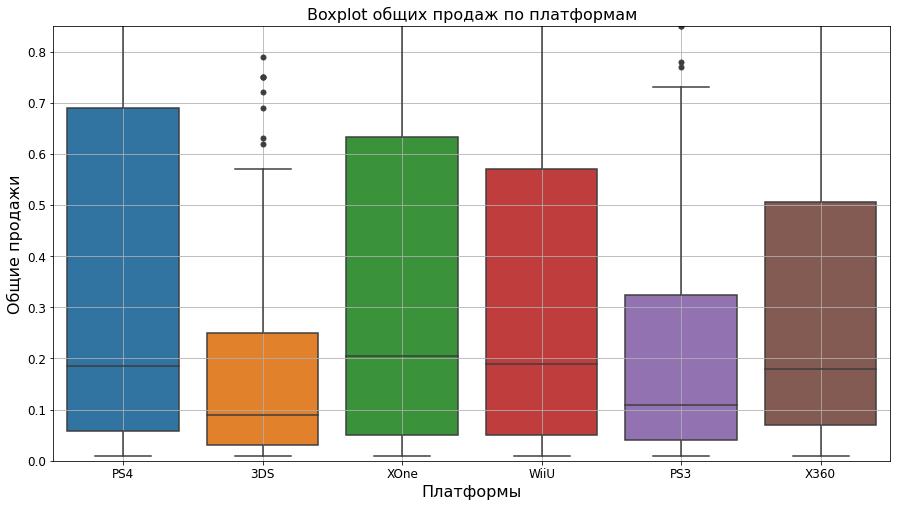

In [29]:
fig, ax = plt.subplots(figsize = (15,8))
fig = sns.boxplot(data=df_2014_top6,
                  x='platform',
                  y='total_sales',
                  flierprops={"marker": "o"}
                 )
ax.set_xlabel('Платформы')
ax.set_ylabel('Общие продажи')
ax.set_title('Boxplot общих продаж по платформам')
ax.set_ylim(0,0.85)
plt.grid(True)
plt.show()

- Количество продаж большей части игр для каждой из платформ до 700 000 копий.   
- Медианное значение продаж колеблется около 200 000 копий, кроме платформ 3DS и PS3, у которых это значение около 100 000 копий.

<a id='p9'></a>
### Влияние отзывов пользователей и критиков на продажи

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами (критиков/пользователей) и суммарными продажами, для выбранных 6 платформ: 'PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU'. 

В пункте "заполнение пропусков", мы заменили отзыв "tbd" на "-1", при дальнейшем расчете корреляции между оценкой и продажами это исказит результаты.  
Поэтому создадим новый датафрейм с играми без оценки "-1"

In [30]:
df_corr = df_2014[df_2014['user_score']!=-1]
print(len(df_2014),len(df_corr)) #проверим, что после удаления количество строк уменьшилось

1689 1596


In [31]:
def plot_scater(ax,n_platform,t_score):
    out = sns.scatterplot(data = df_corr[df_corr['platform']==n_platform],
                          x=t_score,
                          y='total_sales',
                          ax=ax
                         )
    if t_score=='user_score':
        out.set_title('Диаграмма рассеяния между оценками \n пользователей и продажами для: '+ n_platform)
        out.set_xlabel('Оценки пользователей')
        
    else:
        out.set_title('Диаграмма рассеяния между оценками \n критиков и продажами для: '+ n_platform)
        out.set_xlabel('Оценки критиков')
    out.set_ylabel('Общие продажи')
    out.grid(True)
    return out

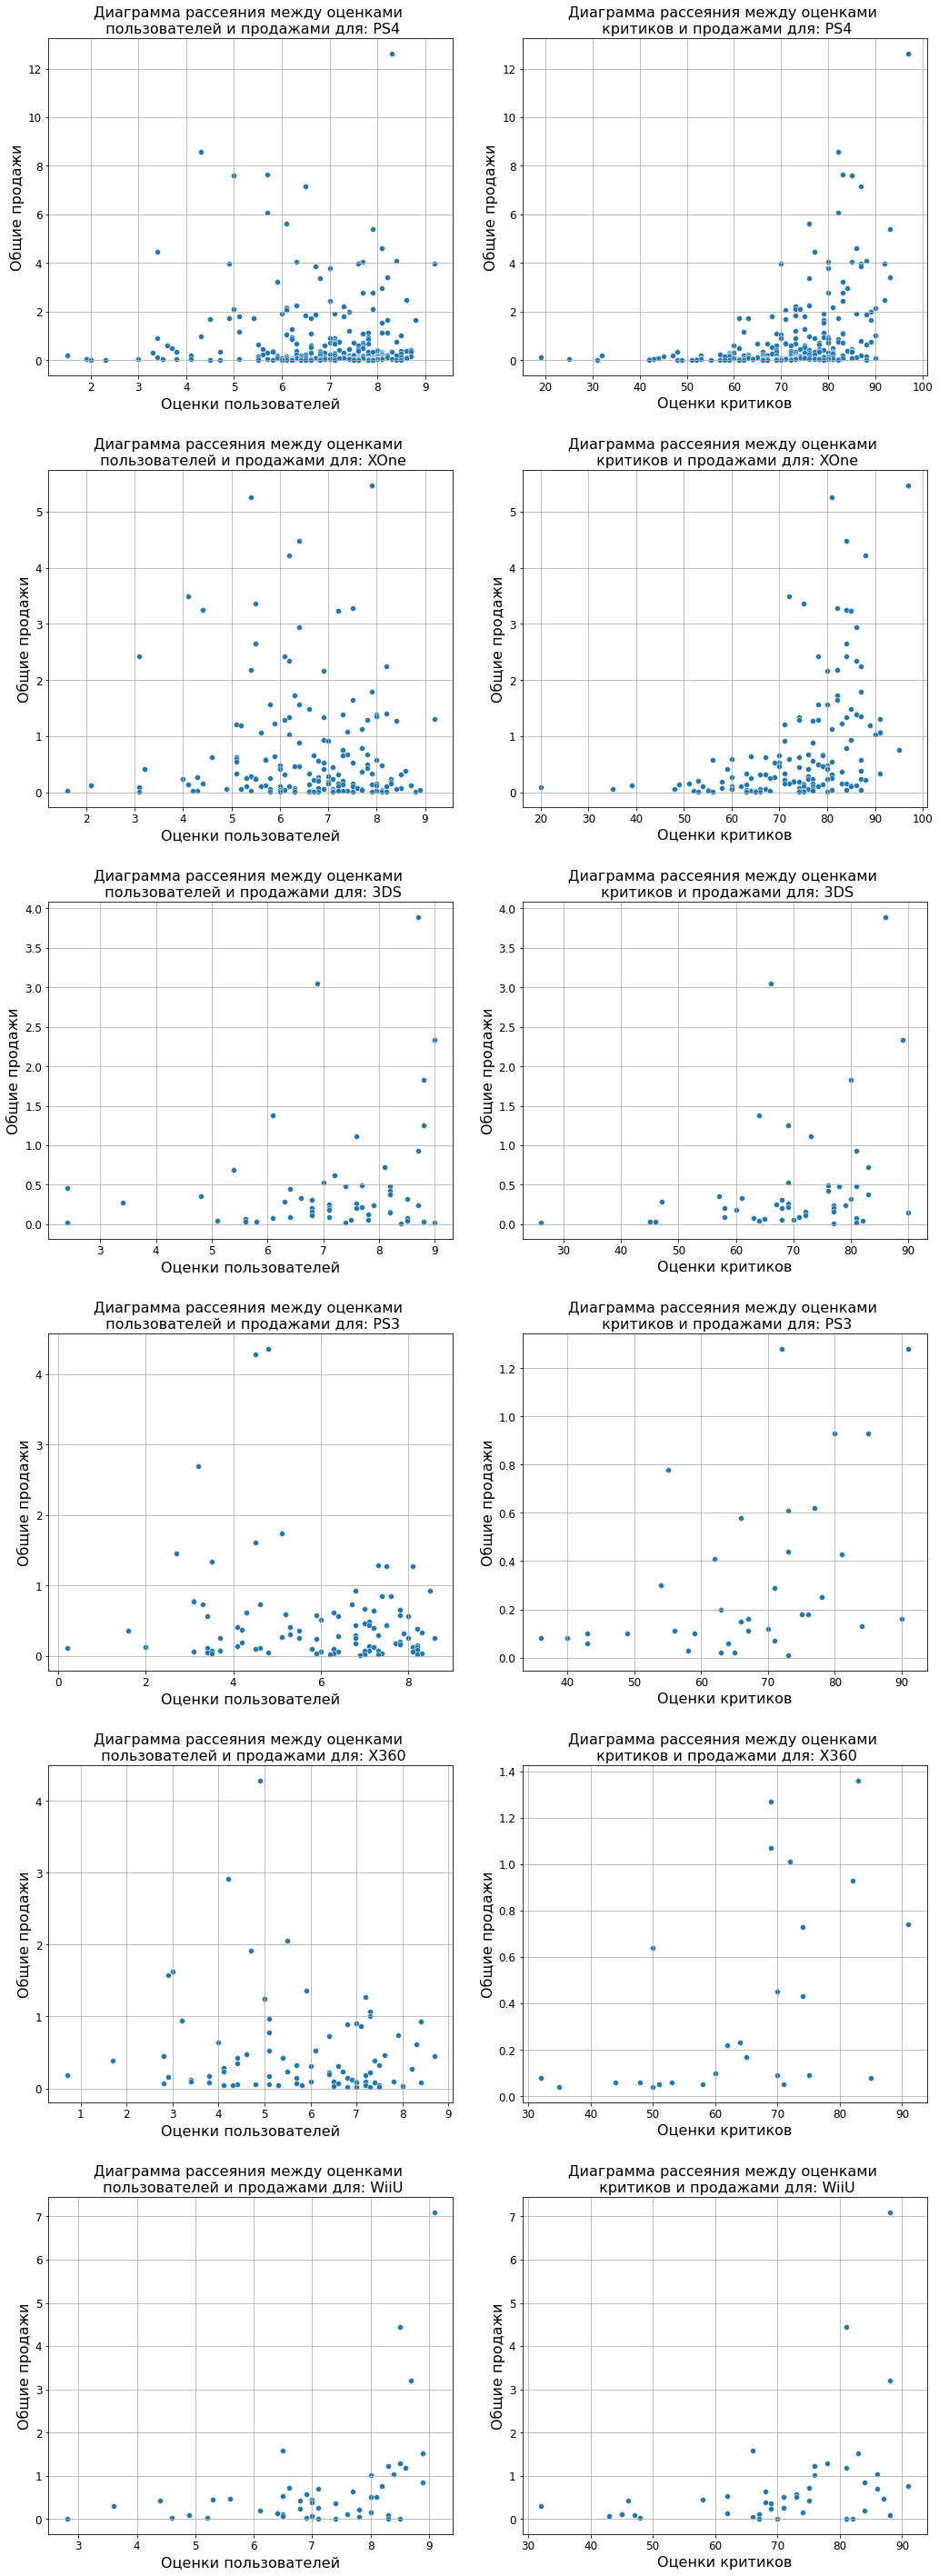

In [32]:
fig,ax = plt.subplots(figsize = (15,40),nrows=6,ncols=2)
for i in range(len(list_of_platforms_2014)):
    type_of_score = ['user_score','critic_score']
    for j in range(2):
        plot_scater(ax[i,j],
                    list_of_platforms_2014[i],
                    type_of_score[j])
fig.tight_layout(pad=3)        
plt.show()

In [33]:
val1 = []
val2 = []
for i in list_of_platforms_2014:
    x = (df_corr[df_corr['platform']==i]['critic_score']
         .corr(df_corr[df_corr['platform']==i]['total_sales'])
        )
    y = (df_corr[df_corr['platform']==i]['user_score']
         .corr(df_corr[df_corr['platform']==i]['total_sales'])
        )
    val1.append(x)
    val2.append(y)
df_with_corr = (pd.DataFrame({'critic_corr':val1,'user_corr':val2},index=list_of_platforms_2014)
                .reset_index())
df_with_corr

,platform,critic_corr,user_corr
0,PS4,0.402498,-0.040132
1,XOne,0.424101,-0.070384
2,3DS,0.284686,0.215193
3,PS3,0.446575,-0.166761
4,X360,0.525723,-0.138445
5,WiiU,0.375640,0.407926


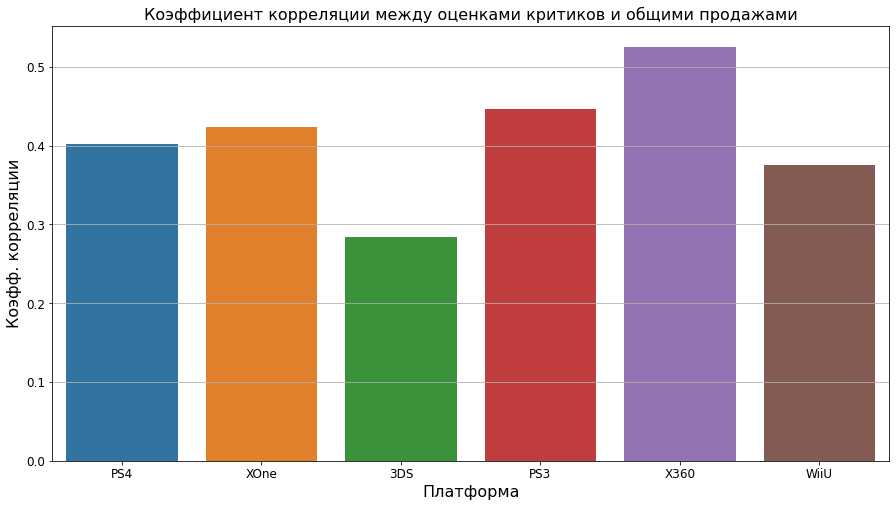

In [34]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(data= df_with_corr,
                 x='platform',
                 y='critic_corr'
                )
ax.set_title('Коэффициент корреляции между оценками критиков и общими продажами')
ax.set_xlabel('Платформа')
ax.set_ylabel('Коэфф. корреляции')
ax.grid(True,axis='y')
plt.show()

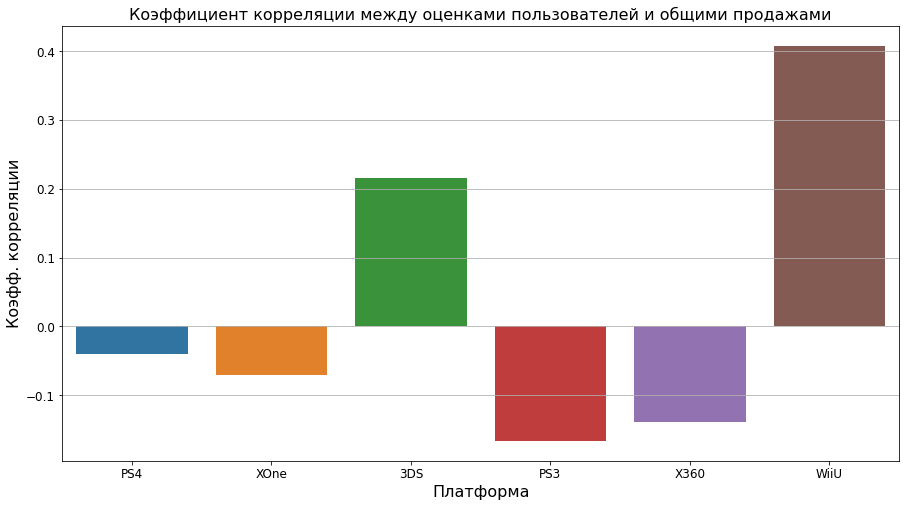

In [35]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(data= df_with_corr,
                 x='platform',
                 y='user_corr'
                )
ax.set_title('Коэффициент корреляции между оценками пользователей и общими продажами')
ax.set_xlabel('Платформа')
ax.set_ylabel('Коэфф. корреляции')
ax.grid(True,axis='y')
plt.show()

- У платформ существует некоторая связь между продажами и оценками.
- Однако эта связь слабая, так как коэффициент корреляции не больше 0.5 для оценок критиков и не больше 0.4 для оценок пользователей

<a id='p10'></a>
### Распределение игр по жанрам

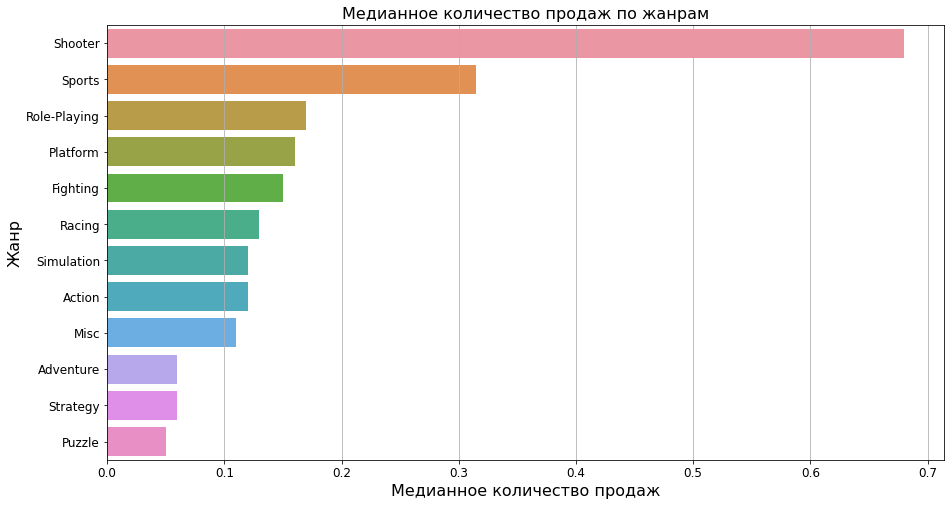

In [36]:
fig, ax = plt.subplots(figsize = (15,8))    
fig = sns.barplot(data=(df_2014_top6.groupby('genre')['total_sales']
                        .median()
                        .sort_values(ascending=False)
                        .reset_index()),
                  y='genre',
                  x='total_sales',
                  orientation='horizontal')
ax.set_title(label='Медианное количество продаж по жанрам')
ax.set_ylabel('Жанр')
ax.set_xlabel('Медианное количество продаж')
ax.grid(True,axis='x')

Наиболее прибыльными являются жанры: 'Shooter', 'Sports', 'Role-Playing'

Мы рассмотрели самые популярные платформы и жанры в целом для магазина, посмотрим как они распределены в зависимости от региона продаж.

## 3. Портрет пользователя каждого региона

<a id='p11'></a>
### Популярные платформы

Определим для пользователя каждого региона самые популряные платформы (топ-5)

In [37]:
#функция для агрегирования значений для строк не входящих в топ-5
def create_top(name_c, name_reg):
    df_p = (df_2014.groupby(name_c)[name_reg]
            .sum()
            .sort_values(ascending=False)
            .reset_index()
           )
    df_p_lead = df_p.iloc[:5]
    df_p_other = df_p.iloc[5:][name_reg].sum()
    df_p_other = pd.DataFrame({name_c:['other'],name_reg:[df_p_other]})
    return pd.concat([df_p_lead,df_p_other]).reset_index(drop=True)

In [38]:
#Функция для построения графика Pie
def plot_pie(ax,data,xname,yname):
    ax.pie(data=data,labels=xname,
              x=yname,
              autopct='%4.1f%%',
              pctdistance=.8, 
              textprops ={'fontsize':14})
    ax.set_title(label = yname)
    return ax

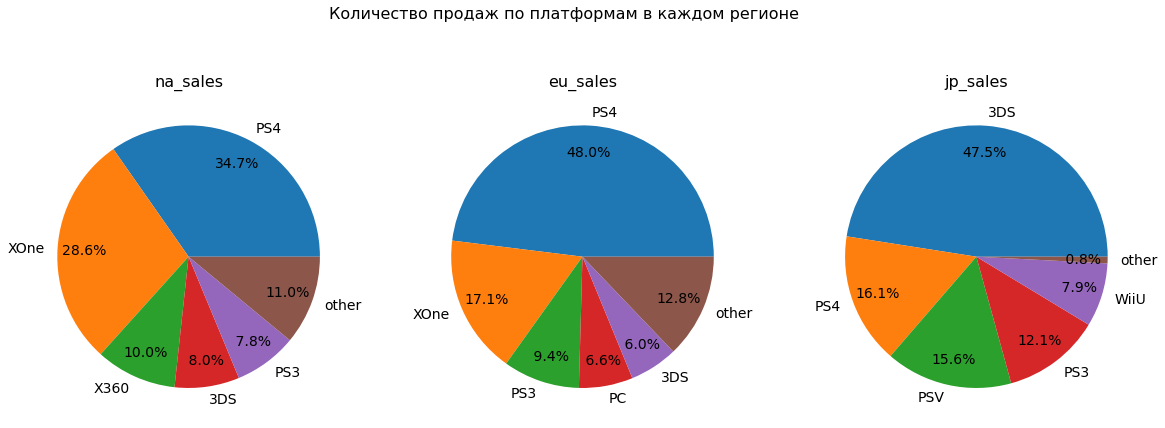

In [39]:
fig, ax = plt.subplots(figsize = (20,10),nrows=1,ncols=3,sharey=True)
list_of_reg = ['na_sales','eu_sales','jp_sales']
for i in range(len(list_of_reg)):
    df_p = create_top('platform',list_of_reg[i])
    plot_pie(ax[i],
             df_p,
             'platform',
             list_of_reg[i]
            )
fig.suptitle('Количество продаж по платформам в каждом регионе',fontsize=16,y=0.85)
plt.show()

In [40]:
#Функция для построения графика boxplot
def plot_box(ax,data,xname,yname,xlabel):
    out = sns.barplot(data=data,x=xname,y=yname,ax=ax)
    out.set_title(label=yname)
    out.set_ylabel('Общее количество продаж')
    out.set_xlabel(xlabel)
    out.grid(True,axis='y')
    return out

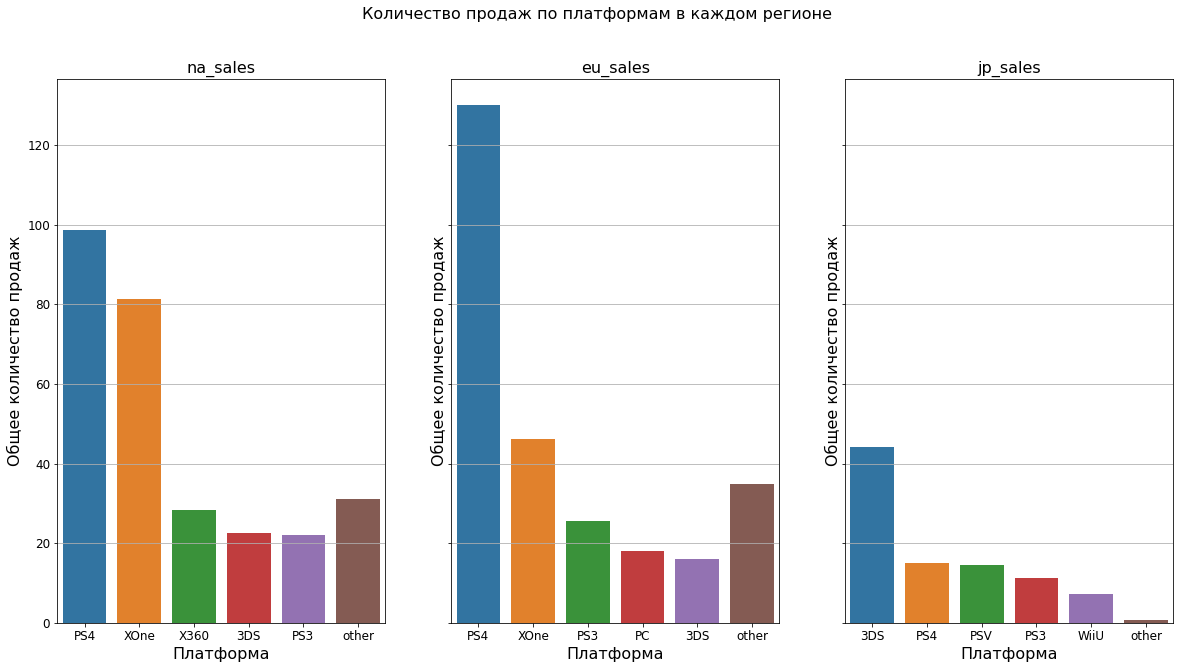

In [41]:
fig, ax = plt.subplots(figsize = (20,10),nrows=1,ncols=3,sharey=True)
for i in range(len(list_of_reg)):
    df_p = create_top('platform',list_of_reg[i])
    plot_box(ax[i],
             df_p,
             'platform',
             list_of_reg[i],
             'Платформа'
            )
fig.suptitle('Количество продаж по платформам в каждом регионе',fontsize=16)
plt.show()

- В Америке доля платформы PS4 (34%) самая высокая, после нее идут Xone, X360, 3DS, PS3.
- В Европе самой популярной платформой является PS4 (48%), после нее идут Xone, PS3, PC, 3DS.
- В Японии самой популярной платформой является 3DS (47,5%), потом идут платформы PS4, PSV, PS3, WiiU.

<a id='p12'></a>
### Популярные жанры

Определим для пользователя каждого региона самые популряные жанры (топ-5)

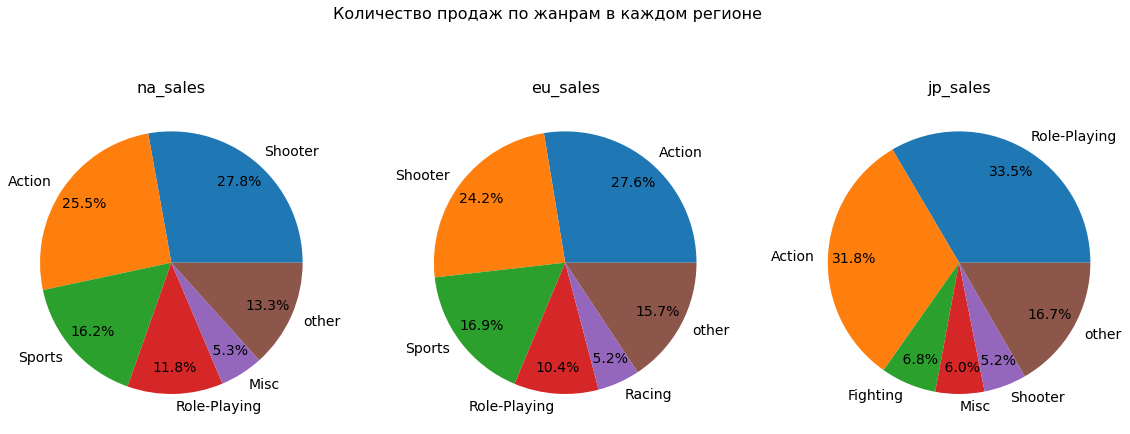

In [42]:
fig, ax = plt.subplots(figsize = (20,20),nrows=1,ncols=3)
for i in range(len(list_of_reg)):
    df_p = create_top('genre',list_of_reg[i])
    plot_pie(ax[i],
             df_p,
             'genre',
             list_of_reg[i]
            )
fig.suptitle('Количество продаж по жанрам в каждом регионе',fontsize=16,y=0.68)
plt.show()

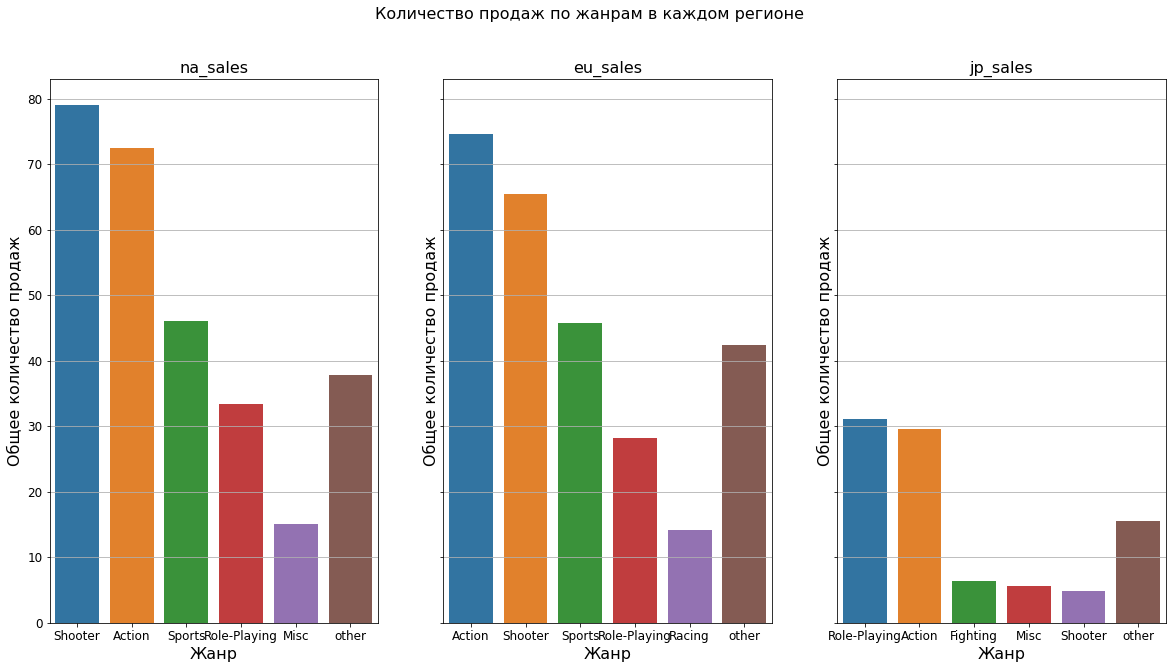

In [43]:
fig, ax = plt.subplots(figsize = (20,10),nrows=1,ncols=3,sharey=True)
for i in range(len(list_of_reg)):
    df_p = create_top('genre',list_of_reg[i])
    plot_box(ax[i],
             df_p,
             'genre',
             list_of_reg[i],
             'Жанр'
            )
fig.suptitle('Количество продаж по жанрам в каждом регионе',fontsize=16)
plt.show()

- В Америке самым популярным жанром является Shooter (28%) и Action (26%), после них идут Sports, Role-Playing и Misc.
- В Европе самым популярным жанром является Action (28%) и Shooter (24%), после них идут Sports, Role-Playing и Racing.
- В Японии самым популярным жанром является Role-Playing (33%) и Action (32%), после него идут Fighting, Misc и Shooter.

<a id='p13'></a>
### Влияние рейтинга ESRB на продажи

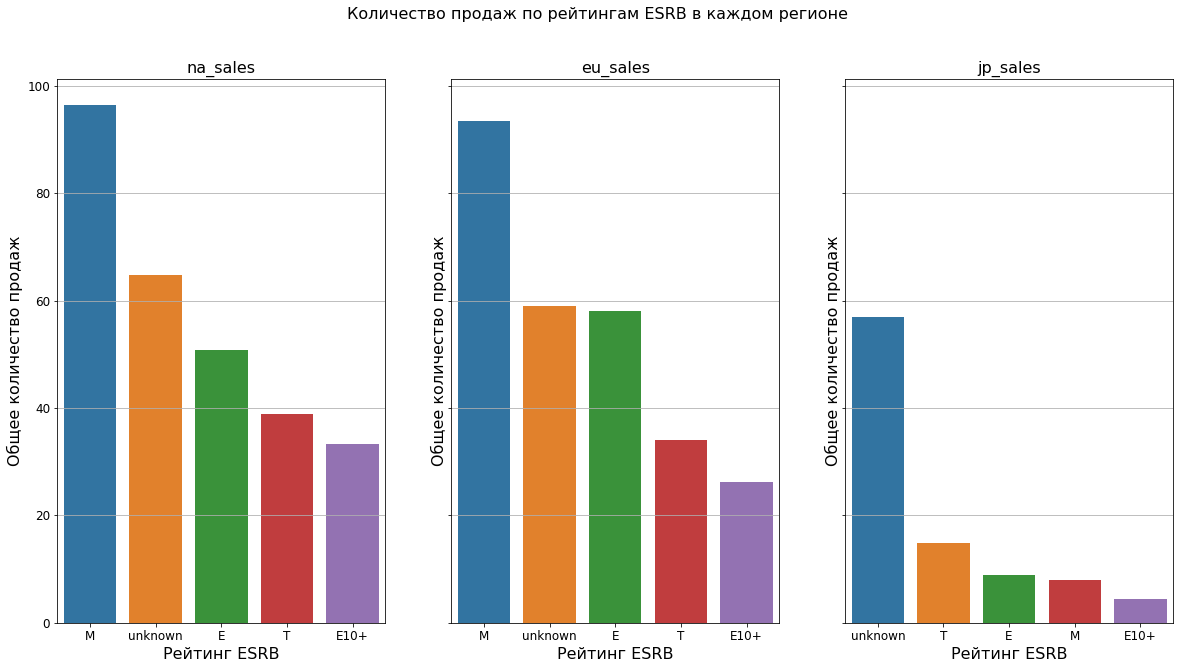

In [44]:
fig, ax = plt.subplots(figsize = (20,10),nrows=1,ncols=3,sharey=True)
for i in range(len(list_of_reg)):
    df_p = (df_2014.groupby('rating')[list_of_reg[i]]
            .sum()
            .sort_values(ascending=False)
            .reset_index()
           )
    plot_box(ax[i],
             df_p,
             'rating',
             list_of_reg[i],
             'Рейтинг ESRB'
            )
fig.suptitle('Количество продаж по рейтингам ESRB в каждом регионе',fontsize=16)
plt.show()

- В Америке и Европе на игры рейтинга M, приходиться больше всего продаж. Далее идут игры с рейтингами unknown, E, T, E10+. 
- В Японии больше всего продаж приходится на игры без рейтинга. 
- Так как в Японии есть своего рейтинговое агенство (CERO) - аналог ESRB, то для пользователей из Японии рейтинг ESRB не важен.


## 4. Проверка гипотез

<a id='p14'></a>
### Гипотеза о равенстве пользовательских рейтингов платформ PC и XOne

H0: cредний пользовательский рейтинг PC = cредний пользовательский рейтинг Xbox One    
H1: cредний пользовательский рейтинг PC != cредний пользовательский рейтинг Xbox One 

In [45]:
df4 = df_2014.copy()
df4 = df4.dropna()
df4 = df4[df4['user_score']!='tbd']
#df4.loc[:,'user_score'] = df4.loc[:,'user_score'].astype('float')
data_pc = df4[(df4['platform']=='PC')]['user_score'].reset_index(drop=True)
data_xone = df4[(df4['platform']=='XOne')]['user_score'].reset_index(drop=True)
alpha = 0.05
results = st.ttest_ind(data_pc,data_xone)
print('p-value равно',results.pvalue)
if results.pvalue> alpha:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-value равно 0.5274671795230982
Принимаем нулевую гипотезу


P-value больше выбранного уровня значимости (alpha = 0.5), что не дает основания отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ PC и XOne

In [46]:
#вывод средних пользовательских рейтингов платформ
print(df4[(df4['platform']=='PC')|(df4['platform']=='XOne')].groupby('platform')['user_score'].mean())

platform
PC      6.341739
XOne    6.472078
Name: user_score, dtype: float64


<a id='p15'></a>
### Гипотеза о равенстве пользовательских рейтингов жанров Action и Sports

*H0: cредний пользовательский рейтинг жанра Action = cредний пользовательский рейтинг жанра Sports   
H1: cредний пользовательский рейтинг жанра Action != cредний пользовательский рейтинг жанра Sports*

In [47]:
data_action = df4[(df4['genre']=='Action')]['user_score'].reset_index(drop=True)
data_sports = df4[(df4['genre']=='Sports')]['user_score'].reset_index(drop=True)
alpha = 0.05
results = st.ttest_ind(data_action,data_sports)
print('p-value равно',results.pvalue)
if results.pvalue> alpha:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-value равно 9.909863557031659e-08
Отвергаем нулевую гипотезу


P-value меньше выбранного уровня значимости (alpha = 0.5), что дает основания отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу альтернативной.

In [48]:
#вывод средних пользовательских рейтингов жанров
df4[(df4['genre']=='Action')|(df4['genre']=='Sports')].groupby('genre')['user_score'].mean()

genre
Action    6.730435
Sports    5.604762
Name: user_score, dtype: float64

<a id='p16'></a>
## 5. Общий вывод

**Выводы**
1. Среднее время жизни популярных платформ не больше 10 лет.
2. Популярным платформам необходимо около 3 лет, чтобы выйти на максимум продаж.
2. Для топ-6 популярных платформ: продажи 75% игр до 700 000 копий. Средние продажи игр около 200 000 копий.  
2. Игры имеют небольшую связь между отзывами критиков и продажами: чем больше оценка, тем больше продажи.
**Рекомендации по регионам продаж**  
1. Северная Америка

    Акцент на играх:      
    - жанров: [Shooter,Action, Sports, Role-Playing, Misc];   
    
    - для платформ: [PS4, XOne, X360, 3DS,PS3];  
    
    - с рейтингами ESRB:  [M, E, T, E10+].    
    
    
2. Европа

    Акцент на играх:      
    - жанров: [Action,Shooter, Sports, Role-Playing, Racing];    
    
    - для платформ: [PS4, XOne, PS3, PC, 3DS]; 
    
    - с рейтингами ESRB: [M, E, T, E10+].     
    
    
3. Япония  

    Акцент на играх:      
    - жанров: [Role-Playing, Action, Fightings, Misc, Shooter];  
    
    - для платформ: [3DS, PS4, PSV, PS3, WiiU]. 
    
   Рейтинг ESRB не влияет на продажи в данном регионе, так как у Японии свое агенство CERO